<a href="https://colab.research.google.com/github/javier-jaime/Stock_Price_Forecasting/blob/main/Tourmaline_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Forecasting with yfinance and Facebook Prophet

## Importing all the necessary Libraries

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=df79f3459f0076491d003f02907c308cd62861797d6c6fec396fa3d4314c6620
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Importing the Dataset & Exploring it

In [17]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '2y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: TOU.TO
You entered TOU.TO, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
493,2021-09-01,33.526543,34.950450,32.809613,34.821007,1610700,0.00,0
494,2021-09-02,34.940493,35.428407,34.532240,34.741344,2207900,0.00,0
495,2021-09-03,34.850876,35.219299,34.372922,35.030109,1104300,0.00,0
496,2021-09-07,35.050024,35.916316,34.701513,35.727127,1387400,0.00,0
497,2021-09-08,35.846617,37.101247,35.786872,36.593422,1943200,0.00,0
498,2021-09-09,36.503805,37.310355,36.244914,37.290440,1732100,0.00,0
499,2021-09-10,37.688732,38.425581,37.549329,38.216476,1580200,0.00,0
500,2021-09-13,38.664559,39.730000,38.664559,39.730000,1900200,0.00,0
501,2021-09-14,39.990002,40.470001,39.750000,40.369999,2764400,0.17,0
502,2021-09-15,41.049999,42.560001,41.049999,42.500000,591504,0.00,0


In [18]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000,503.0
mean,18.454117,18.824649,18.104967,18.478070,1.560841e+06,0.002207,0.0
std,7.827517,7.930678,7.747766,7.864452,1.183851e+06,0.017563,0.0
min,6.852818,7.169545,6.459309,6.516896,3.195000e+05,0.000000,0.0
25%,12.451340,12.669019,12.148191,12.450922,1.000050e+06,0.000000,0.0
50%,16.215053,16.547170,15.941546,16.205284,1.348000e+06,0.000000,0.0
75%,23.475554,23.853689,23.073250,23.445826,1.827550e+06,0.000000,0.0
max,41.049999,42.560001,41.049999,42.500000,1.593540e+07,0.170000,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [19]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [20]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [21]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [22]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

## Data Preparation for Facebook Prophet

In [23]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
498,2021-09-09,37.290440
499,2021-09-10,38.216476
500,2021-09-13,39.730000
501,2021-09-14,40.369999
502,2021-09-15,42.500000


## Creating Facebook Prophet Model

In [24]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [25]:
periods = 10
future=m.make_future_dataframe(periods)

In [26]:
forecast=m.predict(future)

In [27]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-09-16,11.308867,11.378445,14.736318,11.308867,11.308867,1.686771,1.686771,1.686771,-0.551711,-0.551711,-0.551711,2.238481,2.238481,2.238481,0.0,0.0,0.0,12.995637
1,2019-09-17,11.334982,11.422107,14.574345,11.334982,11.334982,1.673137,1.673137,1.673137,-0.558983,-0.558983,-0.558983,2.232120,2.232120,2.232120,0.0,0.0,0.0,13.008119
2,2019-09-18,11.361097,11.391547,14.851370,11.361097,11.361097,1.722130,1.722130,1.722130,-0.485422,-0.485422,-0.485422,2.207552,2.207552,2.207552,0.0,0.0,0.0,13.083227
3,2019-09-19,11.387212,11.191336,14.551961,11.387212,11.387212,1.555181,1.555181,1.555181,-0.609676,-0.609676,-0.609676,2.164857,2.164857,2.164857,0.0,0.0,0.0,12.942393
4,2019-09-20,11.413326,11.413623,14.770691,11.413326,11.413326,1.635112,1.635112,1.635112,-0.469336,-0.469336,-0.469336,2.104448,2.104448,2.104448,0.0,0.0,0.0,13.048438
5,2019-09-23,11.491671,11.232899,14.445262,11.491671,11.491671,1.274173,1.274173,1.274173,-0.551711,-0.551711,-0.551711,1.825884,1.825884,1.825884,0.0,0.0,0.0,12.765844
6,2019-09-24,11.517786,10.968558,14.277524,11.517786,11.517786,1.146070,1.146070,1.146070,-0.558983,-0.558983,-0.558983,1.705053,1.705053,1.705053,0.0,0.0,0.0,12.663857
7,2019-09-25,11.543901,10.921895,14.270033,11.543901,11.543901,1.087697,1.087697,1.087697,-0.485422,-0.485422,-0.485422,1.573119,1.573119,1.573119,0.0,0.0,0.0,12.631598
8,2019-09-26,11.570016,10.717226,14.186074,11.570016,11.570016,0.822452,0.822452,0.822452,-0.609676,-0.609676,-0.609676,1.432128,1.432128,1.432128,0.0,0.0,0.0,12.392469
9,2019-09-27,11.596131,10.792443,14.106881,11.596131,11.596131,0.814947,0.814947,0.814947,-0.469336,-0.469336,-0.469336,1.284283,1.284283,1.284283,0.0,0.0,0.0,12.411078


In [28]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

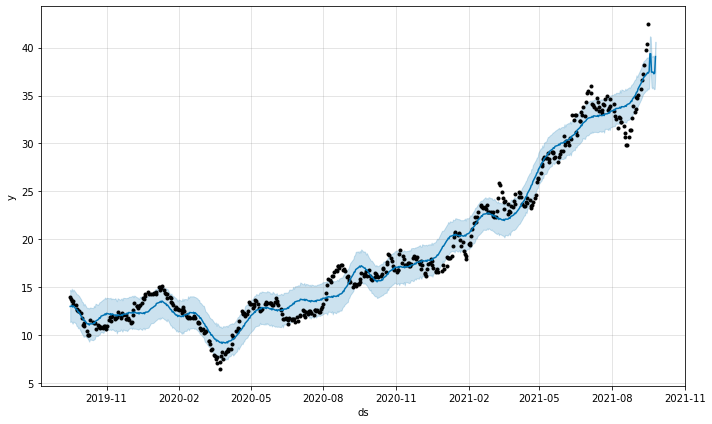

In [29]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

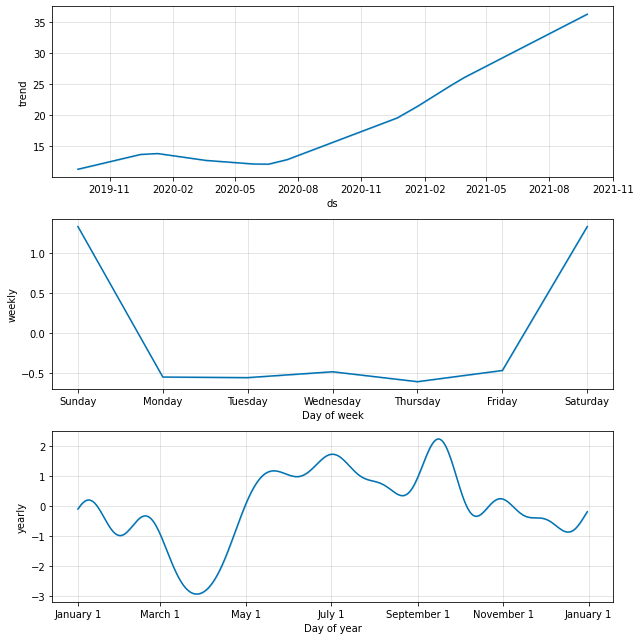

In [30]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [16]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>